# Data z webu EMIS

Zdroje znečišťování za rok 2019 z webu [EMIS](https://www.chmi.cz/files/portal/docs/uoco/web_generator/plants/index_CZ.html). Údaje o provozovnách a emisích ohlášených v souhrnné provozní evidenci

## Zařízení spalující paliva z biomasy s příkonem nejméně 20 resp. 2 MW

Kritéria udržitelnosti podle RED 2018/2001 musí nově splňovat zařízení spalující paliva z biomasy pro výrobu elektřiny, vytápění (a chlazení), jejichž celkový jmenovitý tepelný příkon je nejméně 20 MW v případě pevných paliv resp. nejméně 2 MW v případě plynných paliv. 

Výběr zařízení, která mají údaj o palivu a příslušný příkon (20 MW resp. 2 MW a více) a spadají do kategorie pevná biomasa nebo bioplyn. 

Spousta údajů je neúplných. Jiné nejsou vhodné pro tento účel, protože provozovna na webu EMIS nutně neznamená jeden zdroj, jak bychom si intuitivně přáli (jednu bioplynku, jednu výtopnu) apod. Viz příklad [Energetiky Kněžice](http://portal.chmi.cz/files/portal/docs/uoco/web_generator/plants/CZ020/211902152_CZ.html "Energetika Kněžice"), kde je v jednom zdroji spojená výtopna (s dvěma kotli) a bioplynová stanice, viz [licence](http://licence.eru.cz/detail.php?lic-id=310605027&sequence=1,2&total=2) na webu ERÚ. Jde spíše o jeden areál.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
zdroje = pd.read_csv('data/zdroje.csv', dtype={'adm': 'str'}, low_memory=False, index_col='id')

In [3]:
zdroje = zdroje.loc[:, ['nazev', 'ulice_cp', 'psc_obec', 'prikon', 'paliva']] # columns with emissions not needed
zdroje.head()

,nazev,ulice_cp,psc_obec,prikon,paliva
id,,,,,
730590013,AAA AUTO International Praha - lakovna,Dopraváků 723/1,184 00 Praha,0.7,zemní plyn
727870093,ABB PG Novodvorská,Novodvorská 1768/138a,142 00 Praha,3.8,nafta;zemní plyn
731280711,"AF BKK, s.r.o.",Podkovářská 674/2,190 00 Praha,NaN,NaN
731280551,"AGMA, a.s. - slévárna neželezných kovů",Kolbenova 159/5,190 00 Praha,1.4,zemní plyn
727020251,ALBE PRAHA s.r.o. - chemická čistírna Martinská,Martinská 416/10,110 00 Praha,NaN,NaN


In [4]:
zdroje.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9454 entries, 730590013 to 635980011
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nazev     9454 non-null   object 
 1   ulice_cp  8125 non-null   object 
 2   psc_obec  9454 non-null   object 
 3   prikon    4679 non-null   float64
 4   paliva    4486 non-null   object 
dtypes: float64(1), object(4)
memory usage: 443.2+ KB


### Přehled paliv

#### Všechna paliva


In [5]:
paliva = set()
for cell in zdroje.paliva.dropna().values:
    for palivo in cell.split(';'):
        if palivo not in paliva:
            paliva.add(palivo)
paliva

{'biomasa odpadní',
 'bioplyn',
 'bylinná biomasa (sláma, apod.)',
 'degazační plyn',
 'dřevní biomasa',
 'dřevotříska, překližka, dřevovláknitá deska nebo jiné lepené dřevo',
 'generátorový plyn, vč. produktů zplyňování rafinérských zbytků, apod.',
 'hnědé uhlí prachové',
 'hnědé uhlí tříděné',
 'jiné kapalné palivo',
 'jiné pevné palivo',
 'jiné plynné palivo',
 'jiné plyny z ocelářského průmyslu (např. konvertorový plyn)',
 'jiný druh biomasy',
 'kalový plyn',
 'kapalná biopaliva',
 'koks',
 'koksárenský plyn',
 'nafta',
 'odpad',
 'plynové oleje pro topení (obsah síry max. do 0,1 % vč.)',
 'propan, butan a jejich směsi',
 'proplástek',
 'pyrolýzní olej',
 'skládkový plyn',
 'směsi uhlí',
 'topné oleje nízkosirné (obsah síry více než 0,1% a max. do 1 % vč.)',
 'topné oleje vysokosirné (obsah síry více než 1 %)',
 'vodík',
 'vysokopecní plyn',
 'výlisky z biomasy',
 'výlisky z uhlí',
 'zemní plyn',
 'černé uhlí prachové',
 'černé uhlí tříděné'}

In [6]:
len(paliva)

35

#### Paliva z biomasy


In [7]:
import re
biopaliva = set()
p = re.compile(r'(bio)+|(dřev)+|(překližka)')
for palivo in paliva:
    m = p.search(palivo)
    if m:
        biopaliva.add(palivo)
biopaliva

{'biomasa odpadní',
 'bioplyn',
 'bylinná biomasa (sláma, apod.)',
 'dřevní biomasa',
 'dřevotříska, překližka, dřevovláknitá deska nebo jiné lepené dřevo',
 'jiný druh biomasy',
 'kapalná biopaliva',
 'výlisky z biomasy'}

### Bioplynové stanice nad 2 MW příkonu

#### Bioplyn v kombinaci s jiným palivem

Zahrnuje bioplyn i v kombinaci s jiným palivem (viz nejasná definice provozovny).


In [8]:
bioplyn = zdroje[(zdroje.paliva.str.contains('bioplyn', na=False)) & (zdroje.prikon >= 2)]
# bioplyn.to_csv('data/bps_2+.csv', decimal=',')
print(f'Celkem {bioplyn.shape[0]} bioplynek (vč. ostatních paliv)')

Celkem 162 bioplynek (vč. ostatních paliv)


In [9]:
bioplyn.prikon.describe()

count    162.000000
mean       5.106173
std       12.205837
min        2.000000
25%        2.500000
50%        2.800000
75%        4.050000
max      144.100000
Name: prikon, dtype: float64

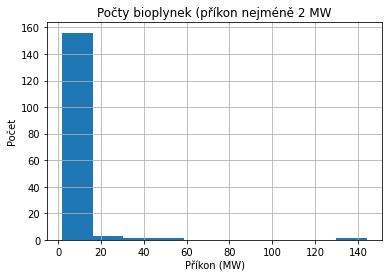

In [10]:
plt.figure()
plt.title('Počty bioplynek (příkon nejméně 2 MW')
plt.xlabel('Příkon (MW)')
plt.ylabel('Počet')
bioplyn.prikon.hist();

#### Pouze bioplyn


In [11]:
bioplyn_cisty = zdroje[(zdroje.paliva.isin(['bioplyn'])) & (zdroje.prikon >= 2)]
# bioplyn.to_csv('data/bps_2+_cisty.csv', decimal=',')
print(f'Celkem {len(bioplyn_cisty)} BPS bez jiného paliva.')

Celkem 110 BPS bez jiného paliva.


In [12]:
bioplyn_cisty['prikon'].describe()

count    110.000000
mean       3.119091
std        1.022992
min        2.000000
25%        2.500000
50%        2.800000
75%        3.375000
max        7.100000
Name: prikon, dtype: float64

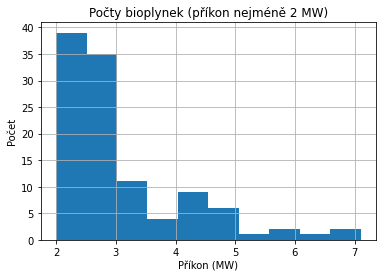

In [13]:
plt.figure()
plt.title('Počty bioplynek (příkon nejméně 2 MW)')
plt.xlabel('Příkon (MW)')
plt.ylabel('Počet')
bioplyn_cisty.prikon.hist();

### Biomasa s nejméně 20 MW příkonu

#### Biomasa v kombinaci s jiným palivem

Zahrnuje čistou biomasu i spoluspalování i část různých zdrojů v jednom areálu (nejednoznačná definice provozovny).

In [14]:
biomasa = zdroje[ (zdroje.prikon >= 20) & ((zdroje.paliva.str.contains('dřevo', na=False)) | (zdroje.paliva.str.contains('bio', na=False)))]
# biomasa.to_csv('data/biomasa_20+.csv', decimal=',')
print(f'Celkem {len(biomasa)} zařízení (vč. ostatních paliv)')

Celkem 49 zařízení (vč. ostatních paliv)


In [15]:
biomasa.prikon.describe()

count      49.000000
mean      166.357143
std       221.217673
min        20.000000
25%        32.500000
50%        53.500000
75%       237.800000
max      1146.200000
Name: prikon, dtype: float64

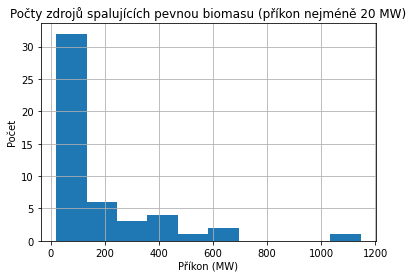

In [16]:
plt.figure()
plt.title('Počty zdrojů spalujících pevnou biomasu (příkon nejméně 20 MW)')
plt.xlabel('Příkon (MW)')
plt.ylabel('Počet')
biomasa.prikon.hist();

#### Pouze čistá biomasa


In [17]:
biomasa_cista = zdroje[(zdroje.prikon >= 20) & (zdroje.paliva.str.contains('bio|dřev', regex=True, na=False) == True) & (zdroje.paliva.str.contains('uhlí|zemní|olej|nafta', regex=True, na=False) == False ) ]
# biomasa_cista.to_csv('data/biomasa_cista_20+.csv', decimal=',')
print(f'Celkem {biomasa_cista.shape[0]} zařízení (čistá biomasa)')
biomasa_cista[['nazev','prikon', 'paliva']]

Celkem 8 zařízení (čistá biomasa)


,nazev,prikon,paliva
id,,,
716500621,Energetické centrum s.r.o.,32.6,"bylinná biomasa (sláma, apod.)"
687130023,"Teplárna Loučovice, a.s.",46.5,dřevní biomasa
755298021,Mayr-Melnhof Holz Paskov s.r.o.,24.0,dřevní biomasa
721280031,"Stora Enso Wood Products Planá, s.r.o.",20.9,dřevní biomasa
211000542,"BIOENERGO - KOMPLEX, s.r.o., Kolín",25.8,"bylinná biomasa (sláma, apod.)"
677900013,EC Distribuce a.s.,20.8,"bylinná biomasa (sláma, apod.)"
677718061,EC Kutná Hora s.r.o.,25.8,"bylinná biomasa (sláma, apod.)"
618340063,LESS & ENERGY s.r.o. - Čáslav,20.2,dřevní biomasa


In [18]:
biomasa_cista.prikon.describe()

count     8.000000
mean     27.075000
std       8.826381
min      20.200000
25%      20.875000
50%      24.900000
75%      27.500000
max      46.500000
Name: prikon, dtype: float64

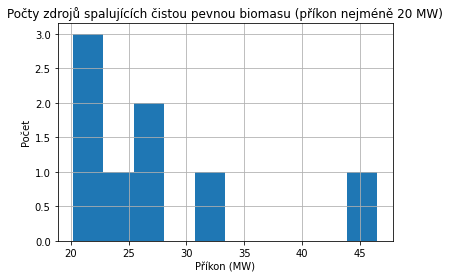

In [19]:
plt.figure()
plt.title('Počty zdrojů spalujících čistou pevnou biomasu (příkon nejméně 20 MW)')
plt.xlabel('Příkon (MW)')
plt.ylabel('Počet')
biomasa_cista.prikon.hist();